In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
def load_data(name):
  image = cv2.imread(name)
  cv2_imshow(image)
  return image

In [3]:
def BGR2GRAY(image):
  return cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

In [4]:
def operator(name):
  image = load_data(name)
  image_gray = BGR2GRAY(image)
  histg = cv2.calcHist([image_gray] , [0] , None , [255] , [0,255])

  plt.bar(np.arange(255), np.squeeze(histg))
  plt.show()

  start = time.time()
  corners = [image_gray[0 , 0] , image_gray[image_gray.shape[0]-1 , 0] , image_gray[0 ,
   image_gray.shape[1]-1] , image_gray[image_gray.shape[0]-1 , image_gray.shape[1]-1]]
  mu_B = np.sum(corners) / 4

  new_image = image_gray.copy()

  new_image[0,0] = 0
  new_image[image_gray.shape[0]-1 , 0] = 0
  new_image[0 , image_gray.shape[1]-1] = 0
  new_image[image_gray.shape[0]-1 , image_gray.shape[1]-1] = 0

  new_image_sum = np.sum(new_image)
  pixels = new_image.shape[0] * new_image.shape[1]
  mu_O = new_image_sum / pixels

  T = (mu_B + mu_O)/2

  new_image = image_gray.copy()
  new_image = new_image.reshape(new_image.shape[0] * new_image.shape[1])

  while(True):
    B = []
    O = []
    for item in new_image:
      if item >= T :
        O.append(item)
      else:
        B.append(item)

    mu_B = np.sum(B) / len(B)
    mu_O = np.sum(O) / len(O)

    if (mu_B + mu_O)/2 == T:
      break
    else:
      T = (mu_B + mu_O)/2

  algoTime = time.time() - start
  print("Time : " , algoTime)
  print("Threshold :" , T)
  (thresh , mask) = cv2.threshold(image_gray , T , 255 , cv2.THRESH_BINARY)
  cv2_imshow(mask)

  segmented_img = cv2.bitwise_and(image, image, mask=mask)
  cv2_imshow(segmented_img)

  # define kernel size
  kernel = np.ones((7, 7), np.uint8)
  # Remove unnecessary noise from mask
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
  mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

  segmented_img_kernel = cv2.bitwise_and(image, image, mask=mask)
  cv2_imshow(segmented_img_kernel)

  return segmented_img , segmented_img_kernel

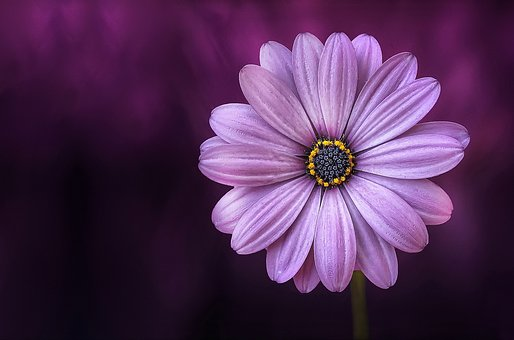

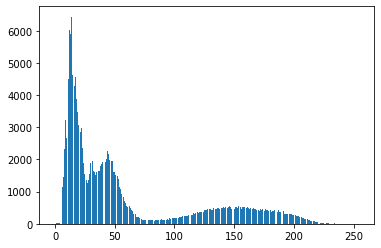

Time :  3.808354139328003
Threshold : 91.9114698701001


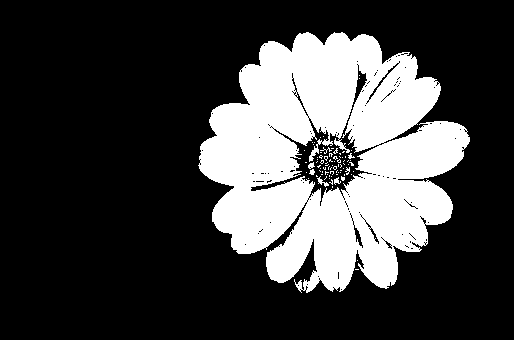

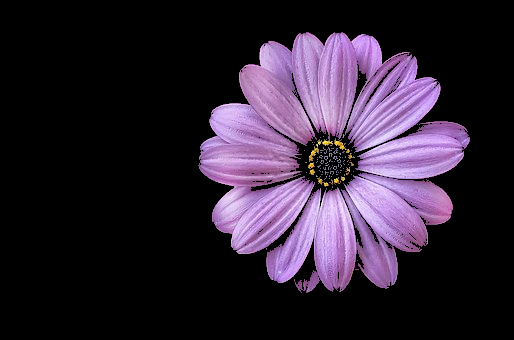

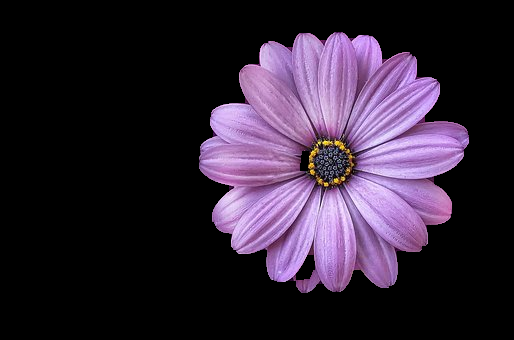

In [5]:
flower ,kernel_flower = operator("flower.jpg")

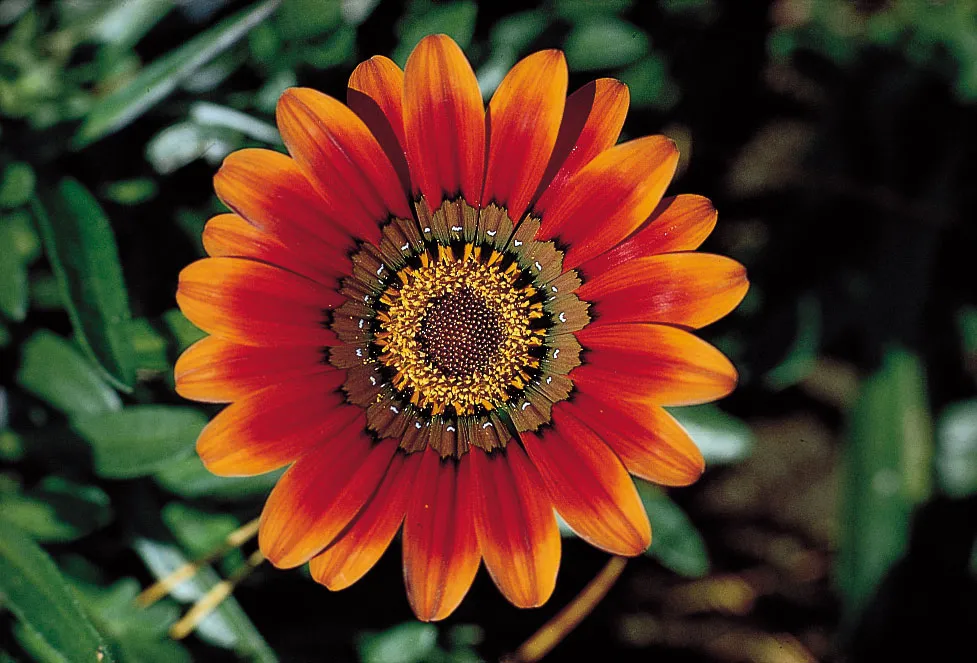

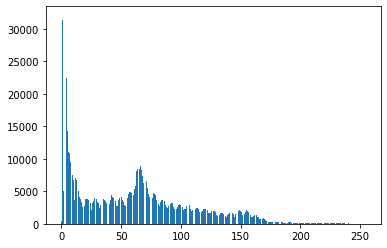

Time :  8.358268737792969
Threshold : 62.92743642365772


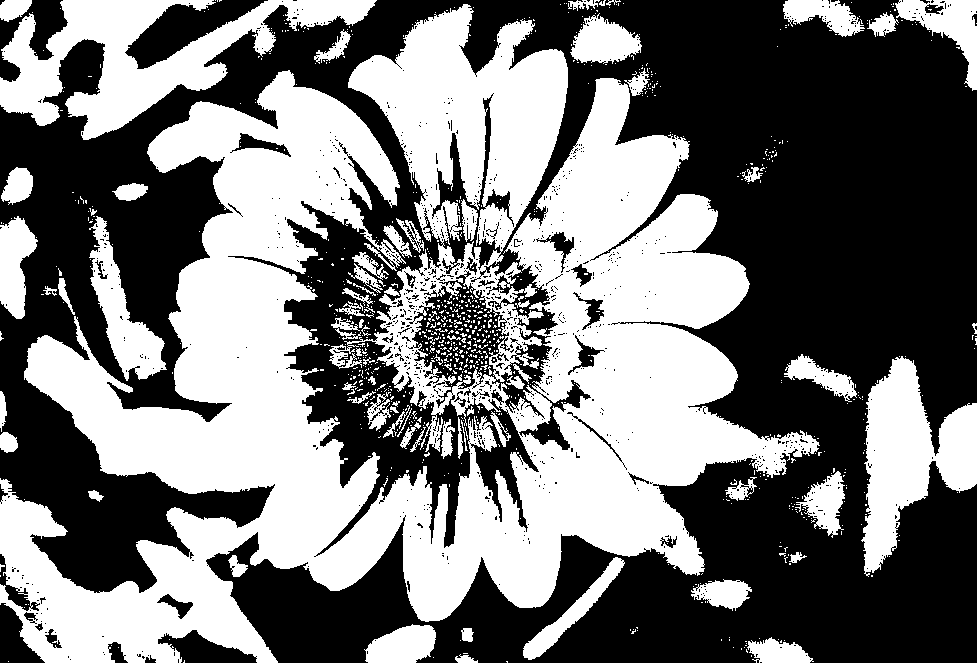

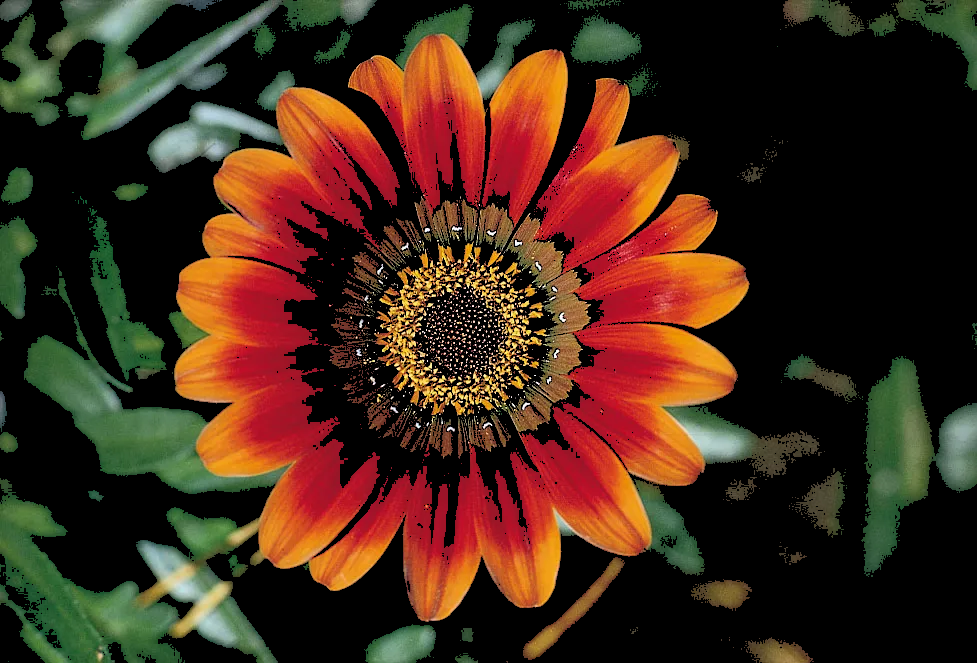

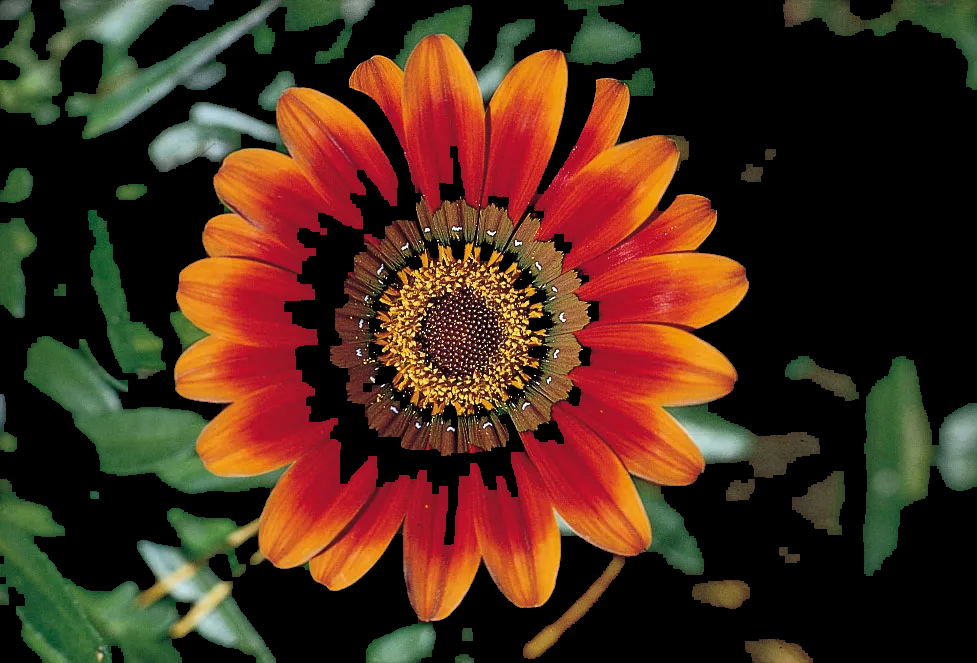

In [6]:
flower1 , kernel_flower1 = operator("flower1.png")

In [19]:
def accuracy(inputs, target):
  first = inputs.reshape(inputs.shape[0] * inputs.shape[1])
  second = target.reshape(inputs.shape[0] * inputs.shape[1])
  truth = 0
  for i in range(first.shape[0]):
    if (first[i] == second[i]).all():
      truth += 1
  
  return truth / first.shape[0]

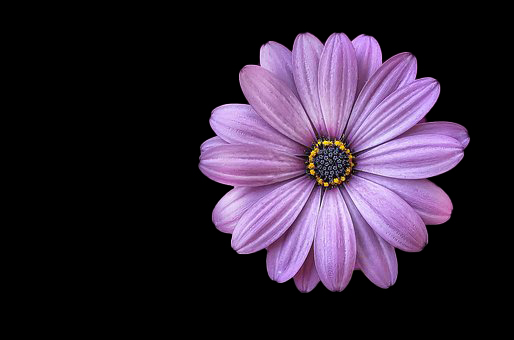

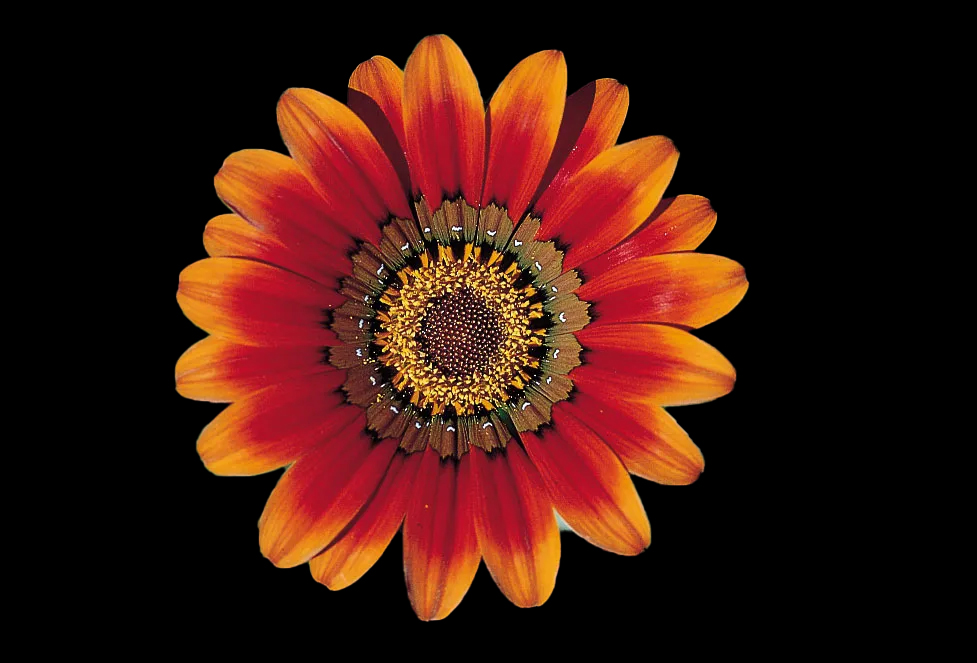

In [8]:
main_mask_flower = load_data("main_mask_flower.jpg")
main_mask_flower1 = load_data("main_mask_flower1.jpg")

In [20]:
accuracy(BGR2GRAY(main_mask_flower) , BGR2GRAY(flower))

0.9033588921950103

In [22]:
accuracy(BGR2GRAY(main_mask_flower) , BGR2GRAY(kernel_flower))

0.9195353627832455

In [25]:
accuracy(BGR2GRAY(main_mask_flower1) , BGR2GRAY(flower1))

0.6363000597451799

In [26]:
accuracy(BGR2GRAY(main_mask_flower1) , BGR2GRAY(kernel_flower1))

0.6477442721045586